In [98]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image as pil_image

# Utilities

In [99]:
def img_show(img, title = '', figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.gray()
    plt.title(title)
    plt.show()

In [100]:
def getPerspectiveTransform(pts1, pts2, use_cv2 = True):
    if use_cv2:
        return cv2.getPerspectiveTransform(pts1,pts2)
    
    # we need to solve Ax = b
    # A^(-1)Ax = A^(-1)b
    # x = A^(-1)b
    pts2 = np.negative(pts2)
    A = np.array(
        [
            [pts1[0][0], pts1[0][1], 1, 0, 0, 0, 0, 0, 0, pts2[0][0], 0, 0, 0],
            [0, 0, 0, pts1[0][0], pts1[0][1], 1, 0, 0, 0, pts2[0][1], 0, 0, 0],
            [0, 0, 0, 0, 0, 0, pts1[0][0], pts1[0][1], 1, -1, 0, 0, 0],
            [pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, 0, 0, 0, pts2[1][0], 0, 0],
            [0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, pts2[1][1], 0, 0],
            [0, 0, 0, 0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, -1, 0, 0],
            [pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, pts2[2][0], 0],
            [0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, pts2[2][1], 0],
            [0, 0, 0, 0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, -1, 0],
            [pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, pts2[3][0]],
            [0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, pts2[3][1]],
            [0, 0, 0, 0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, -1],
            np.ones(13),
        ]
    )
    
    b = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
    x = np.dot(np.linalg.inv(A), b)
    return x[:9].reshape((3, 3)) / x[8]

# Image to be transformed

In [101]:
image = pil_image.open('./cvbook.jpg')
np_img = np.array(image)

# Perspactive transfrom example

In [102]:
def projective_tranform(img, use_cv2):
    pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
    pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])
    
    print("pts1:\n{}".format(pts1))
    print("pts2:\n{}".format(pts2))
    
    M = getPerspectiveTransform(pts1, pts2, use_cv2=use_cv2)
    print(img.shape[:2])
    dst = cv2.cv2.warpPerspective(img, M, (300, 400))
    img_show(img)
    img_show(dst)

pts1:
[[241.   6.]
 [726.  29.]
 [  6. 668.]
 [627. 837.]]
pts2:
[[  0.   0.]
 [300.   0.]
 [  0. 400.]
 [300. 400.]]
(849, 732)


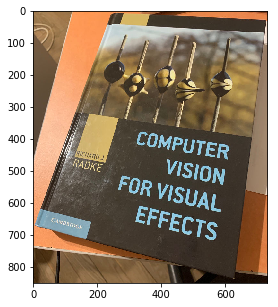

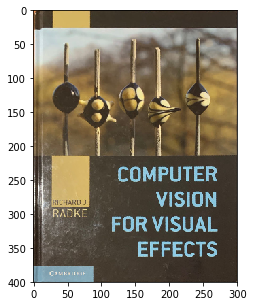

In [103]:
projective_tranform(np_img, True)

# Custom implementation of perspective transform

pts1:
[[241.   6.]
 [726.  29.]
 [  6. 668.]
 [627. 837.]]
pts2:
[[  0.   0.]
 [300.   0.]
 [  0. 400.]
 [300. 400.]]
(849, 732)


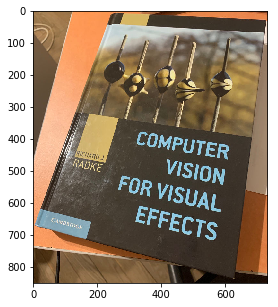

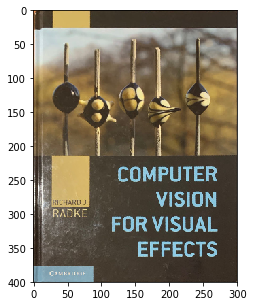

In [104]:
projective_tranform(np_img, False)